Running E91 without eavesdropping...

CHSH Parameter (S): -0.421
Quantum expectation: ~2.828
Classical limit: ≤ 2
Key match percentage: 65.62%

First 10 sifted key bits:
Alice: [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
Bob:   [1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

Running E91 with eavesdropping...

CHSH Parameter (S): 0.666
Quantum expectation: ~2.828
Classical limit: ≤ 2
Key match percentage: 75.68%

First 10 sifted key bits:
Alice: [0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
Bob:   [0, 0, 1, 1, 1, 1, 0, 1, 1, 1]


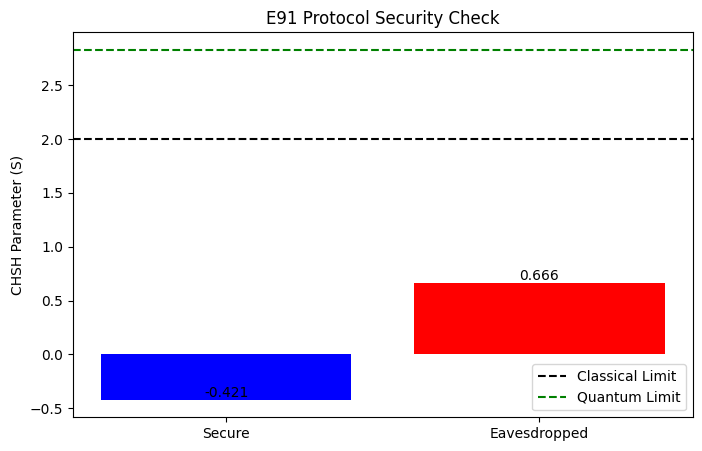

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Define basis vectors
def get_basis_vectors(basis):
    if basis == 'Z':  # Standard basis (0°, 90°)
        return np.array([1, 0]), np.array([0, 1])
    elif basis == 'X':  # Diagonal basis (45°, 135°)
        return (np.array([1, 1])/np.sqrt(2), np.array([1, -1])/np.sqrt(2))
    elif basis == 'Y':  # Circular basis (left/right polarization)
        return (np.array([1, 1j])/np.sqrt(2), np.array([1, -1j])/np.sqrt(2))
    else:
        raise ValueError("Invalid basis")

# Step 2: Create Bell state
def create_bell_state():
    # |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
    return np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

# Step 3: Fixed measurement function
def measure_state(state, basis):
    basis_vectors = get_basis_vectors(basis)
    # Projection operator for |0⟩ in the chosen basis
    P0 = np.outer(basis_vectors[0], basis_vectors[0].conj())
    # Probability of measuring |0⟩
    prob_0 = np.abs((state.conj().T @ np.kron(P0, np.eye(2)) @ state).item())

    if random.random() < prob_0:
        # Collapse to |0⟩ in measurement basis
        return 0
    else:
        # Collapse to |1⟩ in measurement basis
        return 1

# Step 4: Run E91 protocol
def run_e91_protocol(num_pairs=1000, eve_present=False):
    alice_bases = random.choices(['Z', 'X', 'Y'], k=num_pairs)
    bob_bases = random.choices(['Z', 'X', 'Y'], k=num_pairs)

    alice_results = []
    bob_results = []

    for i in range(num_pairs):
        state = create_bell_state()

        if eve_present:
            eve_basis = random.choice(['Z', 'X', 'Y'])
            eve_result = measure_state(state, eve_basis)
            # Collapse state based on Eve's measurement
            if eve_result == 0:
                state = np.array([1, 0, 0, 0])  # |00⟩
            else:
                state = np.array([0, 0, 0, 1])  # |11⟩

        alice_result = measure_state(state, alice_bases[i])
        bob_result = measure_state(state, bob_bases[i])

        alice_results.append(alice_result)
        bob_results.append(bob_result)

    return alice_bases, bob_bases, alice_results, bob_results

# Step 5: Sift keys
def sift_keys(alice_bases, bob_bases, alice_results, bob_results):
    sifted_alice = []
    sifted_bob = []

    for a_basis, b_basis, a_res, b_res in zip(alice_bases, bob_bases, alice_results, bob_results):
        if a_basis == b_basis:
            sifted_alice.append(a_res)
            sifted_bob.append(b_res)

    return sifted_alice, sifted_bob

# Step 6: Calculate CHSH parameter
def calculate_chsh(alice_bases, bob_bases, alice_results, bob_results):
    # Define the combinations needed for CHSH
    combinations = [
        ('Z', 'Z'),
        ('Z', 'X'),
        ('X', 'Z'),
        ('X', 'X')
    ]

    E_values = []

    for a_basis, b_basis in combinations:
        same = 0
        total = 0
        for a_actual, b_actual, a_res, b_res in zip(alice_bases, bob_bases, alice_results, bob_results):
            if a_actual == a_basis and b_actual == b_basis:
                total += 1
                if a_res == b_res:
                    same += 1
        if total > 0:
            E = (same - (total - same)) / total
            E_values.append(E)
        else:
            E_values.append(0)

    S = E_values[0] + E_values[1] + E_values[2] - E_values[3]
    return S

# Step 7: Run simulation without eavesdropping
print("Running E91 without eavesdropping...")
alice_bases_secure, bob_bases_secure, alice_results_secure, bob_results_secure = run_e91_protocol(num_pairs=100, eve_present=False)
sifted_alice_secure, sifted_bob_secure = sift_keys(alice_bases_secure, bob_bases_secure, alice_results_secure, bob_results_secure)
S_secure = calculate_chsh(alice_bases_secure, bob_bases_secure, alice_results_secure, bob_results_secure)

print(f"\nCHSH Parameter (S): {S_secure:.3f}")
print("Quantum expectation: ~2.828")
print("Classical limit: ≤ 2")
print(f"Key match percentage: {np.mean(np.array(sifted_alice_secure) == np.array(sifted_bob_secure)):.2%}")
print("\nFirst 10 sifted key bits:")
print("Alice:", sifted_alice_secure[:10])
print("Bob:  ", sifted_bob_secure[:10])

# Step 8: Run simulation with eavesdropping
print("\nRunning E91 with eavesdropping...")
alice_bases_eavesdropped, bob_bases_eavesdropped, alice_results_eavesdropped, bob_results_eavesdropped = run_e91_protocol(num_pairs=100, eve_present=True)
sifted_alice_eavesdropped, sifted_bob_eavesdropped = sift_keys(alice_bases_eavesdropped, bob_bases_eavesdropped, alice_results_eavesdropped, bob_results_eavesdropped)
S_eavesdropped = calculate_chsh(alice_bases_eavesdropped, bob_bases_eavesdropped, alice_results_eavesdropped, bob_results_eavesdropped)

print(f"\nCHSH Parameter (S): {S_eavesdropped:.3f}")
print("Quantum expectation: ~2.828")
print("Classical limit: ≤ 2")
print(f"Key match percentage: {np.mean(np.array(sifted_alice_eavesdropped) == np.array(sifted_bob_eavesdropped)):.2%}")
print("\nFirst 10 sifted key bits:")
print("Alice:", sifted_alice_eavesdropped[:10])
print("Bob:  ", sifted_bob_eavesdropped[:10])

# Step 9: Plot results
def plot_results(S_secure, S_eavesdropped):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(['Secure', 'Eavesdropped'], [S_secure, S_eavesdropped],
                  color=['blue', 'red'])
    plt.axhline(y=2, color='black', linestyle='--', label='Classical Limit')
    plt.axhline(y=2.828, color='green', linestyle='--', label='Quantum Limit')
    plt.ylabel('CHSH Parameter (S)')
    plt.title('E91 Protocol Security Check')
    plt.legend()
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    plt.show()

plot_results(S_secure, S_eavesdropped)  # Use actual calculated S values